数据与展平
“图像→向量”的形状与数值

原始形状: torch.Size([1, 28, 28])
展平后形状: torch.Size([784])
像素范围: 0.0 1.0


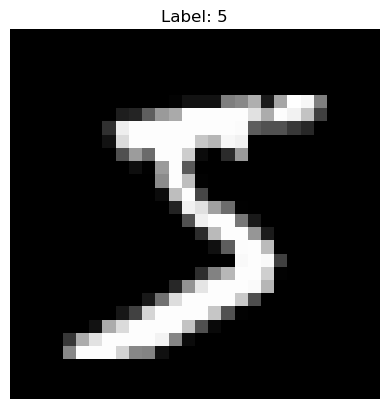

In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

img, label = train_ds[0]
print("原始形状:", img.shape)         # (1, 28, 28)
x = img.view(-1)
print("展平后形状:", x.shape)         # (784,)
print("像素范围:", float(x.min()), float(x.max()))

plt.imshow(img.squeeze(), cmap="gray"); plt.title(f"Label: {label}"); plt.axis("off"); plt.show()


原始形状: torch.Size([1, 28, 28])
展平后形状: torch.Size([784])
像素范围: 0.0 1.0


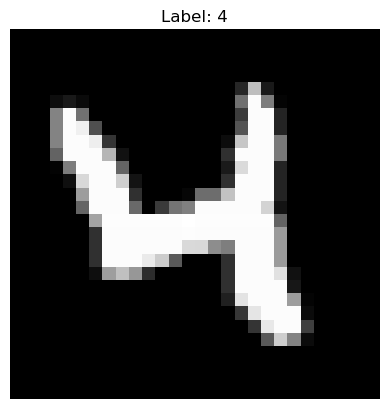

In [4]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.ToTensor()
train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

img, label = train_ds[20]
print("原始形状:", img.shape)         # (1, 28, 28)
x = img.view(-1)
print("展平后形状:", x.shape)         # (784,)
print("像素范围:", float(x.min()), float(x.max()))

plt.imshow(img.squeeze(), cmap="gray"); plt.title(f"Label: {label}"); plt.axis("off"); plt.show()


view(-1) ：一种非常实用的张量形状调整操作，用于将多维张量 "展平" 为一维向量

当执行 x = img.view(-1) 时：
-1 是一个特殊值，告诉 PyTorch 自动计算这个维度的大小
计算逻辑是保持总元素数量不变（1×28×28 = 784）
最终会得到一个形状为 (784,) 的一维张量，包含了所有像素值
对于复杂维度的张量（如批量图像 (64, 1, 28, 28)），view(-1) 会直接展平为 (64×1×28×28,) = (50176,)
x.view(-1) 通过「保持总元素数不变、按行优先顺序排列」的方式，将任意维度的张量转换为一维向量，这正是逻辑回归等线性模型所需的输入格式

In [5]:
# 按28×28矩阵格式打印所有像素值（去除通道维度后）
print("\n28×28格式的所有像素值：")
print(img.squeeze())  # squeeze()去除维度为1的通道，得到(28,28)的矩阵


28×28格式的所有像素值：
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000

线性回归迷你实验
用 1D 数据感受“前向→损失→反传→更新”的完整链条

In [6]:
import torch, torch.nn as nn, torch.optim as optim
torch.manual_seed(0)

# y = 2x + 3 的小数据
X = torch.tensor([[1.0],[2.0],[3.0],[4.0]])
y = 2*X + 3

model = nn.Linear(1,1)
opt = optim.SGD(model.parameters(), lr=0.1)
mse = nn.MSELoss()

for step in range(5):
    # 前向
    y_hat = model(X)
    loss = mse(y_hat, y)

    # 观察参数与梯度（反传前梯度应为 None 或 0）
    w, b = model.weight.item(), model.bias.item()
    print(f"[step {step}] loss={loss.item():.4f}, w={w:.4f}, b={b:.4f}")

    opt.zero_grad()      # 清梯度
    loss.backward()      # 反向：梯度写入 param.grad
    print("  grad(w)=", model.weight.grad.item(), " grad(b)=", model.bias.grad.item())

    opt.step()           # 用梯度更新参数


[step 0] loss=61.0219, w=-0.0075, b=0.5364
  grad(w)= -42.430084228515625  grad(b)= -14.964547157287598
[step 1] loss=27.6071, w=4.2355, b=2.0329
  grad(w)= 28.69731903076172  grad(b)= 9.243406295776367
[step 2] loss=12.5921, w=1.3658, b=1.1086
  grad(w)= -18.97036361694336  grad(b)= -6.953935146331787
[step 3] loss=5.8390, w=3.2628, b=1.8040
  grad(w)= 12.962152481079102  grad(b)= 3.922034502029419
[step 4] loss=2.7961, w=1.9666, b=1.4117
  grad(w)= -8.442092895507812  grad(b)= -3.3434484004974365


解析版本

In [ ]:
import torch, torch.nn as nn, torch.optim as optim
# 导入PyTorch库：
# torch：核心库，提供张量操作和自动求导等功能
# torch.nn：神经网络模块，包含线性层、损失函数等
# torch.optim：优化器模块，包含SGD等优化算法

torch.manual_seed(0)
# 设置随机种子，确保实验结果可复现（每次运行参数初始化相同）

# y = 2x + 3 的小数据
X = torch.tensor([[1.0],[2.0],[3.0],[4.0]])  # 输入特征，形状为(4,1)（4个样本，每个1个特征）
y = 2*X + 3  # 标签，遵循y=2x+3的真实规律，形状为(4,1)

model = nn.Linear(1,1)
# 定义线性模型：nn.Linear(输入特征数, 输出特征数)
# 这里输入1个特征(x)，输出1个预测值(y_hat)
# 模型包含两个参数：权重w（weight）和偏置b（bias），初始值随机生成

opt = optim.SGD(model.parameters(), lr=0.1)
# 定义优化器：随机梯度下降（SGD）
# model.parameters()：指定需要优化的参数（w和b）
# lr=0.1：学习率，控制参数更新的步长

mse = nn.MSELoss()
# 定义损失函数：均方误差（MSE）
# 计算公式：loss = (1/n)Σ(y_hat - y)²，衡量预测值与真实值的差距

for step in range(5):  # 迭代5次训练
    # 1. 前向传播：计算预测值
    y_hat = model(X)  # 输入X，通过模型计算预测值y_hat
    # 模型内部计算：y_hat = w * X + b（线性变换）

    # 2. 计算损失：衡量预测值与真实值的差距
    loss = mse(y_hat, y)  # 用MSE损失函数计算loss

    # 3. 观察当前状态：参数值和损失
    w, b = model.weight.item(), model.bias.item()  # 提取当前w和b的数值
    print(f"[step {step}] loss={loss.item():.4f}, w={w:.4f}, b={b:.4f}")
    # 打印当前迭代步数、损失值、权重w和偏置b

    # 4. 梯度清零
    opt.zero_grad()  # 清空上一轮迭代积累的梯度
    # 原因：PyTorch的梯度会累加，若不清零，新梯度会与旧梯度叠加，导致计算错误

    # 5. 反向传播：计算参数梯度
    loss.backward()  # 自动求导，计算loss对w和b的梯度
    # 梯度结果存储在 model.weight.grad 和 model.bias.grad 中
    print("  grad(w)=", model.weight.grad.item(), " grad(b)=", model.bias.grad.item())
    # 打印当前w和b的梯度值

    # 6. 参数更新：用梯度更新w和b
    opt.step()  # 优化器根据梯度更新参数
    # 更新公式：w = w - lr * w_grad；b = b - lr * b_grad


线性模型Linear的两个参数：权重w（weight）和偏置b（bias）

张量：“快递箱”，形状 就是 “快递箱的规格”—— 比如 “1 层 ×1 个格子”“1 排 ×1 个格子”，不同规格的箱子，装的东西、用的场景不一样，
但里面核心的 “货物”（就是我们要的 w 和 b）其实只有 1 个。

1. 权重 weight：形状 (1,1) → “1 层 1 格的快递盒”
(1,1) 里的两个数字，你可以理解为 “层数 × 每层格子数”（对应矩阵的 “行数 × 列数”）。
所以 (1,1) 就是：只有 1 层，每层只有 1 个格子的盒子，盒子里装的就是我们要的权重 w

为什么不用 “无包装的单个货物”（标量），非要用 “1 层 1 格的盒子”？
因为线性层（nn.Linear）是个 “通用工具”—— 它不仅能处理 “1 个输入→1 个输出”（你的线性回归），还能处理 “2 个输入→3 个输出”（比如输入身高、体重，输出 3 种疾病风险）。
而 “通用工具” 的核心运算规则是 “矩阵乘法”（就像快递站打包时，必须按统一的 “多层多格” 规格分拣）。
比如：
如果你有 2 个输入特征（比如 x1=1.0, x2=2.0），要输出 3 个结果，weight 就得是 (3,2) 的盒子（3 层，每层 2 格），才能和输入做矩阵乘法；
你的场景是 “1 个输入→1 个输出”，就用最小的 “1 层 1 格” 盒子（(1,1)），既满足 “矩阵乘法” 的统一规则，又不会浪费空间。

简单说：(1,1) 是为了让 w 符合线性层 “必须用矩阵乘法算” 的 “规矩”，哪怕只是装 1 个数字。
2. 偏置 bias：形状 (1,) → “1 排 1 格的快递袋”
随机梯度下降的 “随机”，就是每次不看所有数据，只随机抽一部分（甚至 1 个）样本算梯度、更参数，用少量数据的 “局部信息” 快速逼近最优解，是深度学习中高效训练的核心工具

1.logits 与 probs 的区别及交叉熵输入选择 
logits：模型最后一层原始输出（无范围限制的分数）。 
probs：logits 经 Softmax 处理后的概率分布（和为 1，范围 [0,1]）。 
交叉熵输入 logits：PyTorch 会自动完成 Softmax 计算，避免指数运算导致的数值不稳定，同时提升计算效率。
Softmax 函数 是分类任务中把模型原始输出（logits）转化为 “概率分布” 的核心工具，核心作用是让输出满足 “所有类别概率之和为 1”，且每个类别概率在 [0,1] 之间，方便后续判断类别或计算损失。
交叉熵（Cross-Entropy）是衡量两个概率分布差异的指标，在分类任务中用于量化 “模型预测概率” 与 “真实标签分布” 之间的差距，是训练分类模型的核心损失函数。

2.Softmax 与 logits、交叉熵的关系（关键！） 在分类任务中，Softmax 几乎总是和交叉熵损失（Cross-Entropy Loss） 搭配使用，且存在一个重要 “分工”： 模型输出 logits → 不直接过 Softmax；损失函数内部自动做 Softmax：比如 PyTorch 的 nn.CrossEntropyLoss 会先对输入的 logits 计算 Softmax 得到概率，再计算交叉熵。

3.参数微小更新的原因
更新幅度由 “学习率 × 梯度” 决定，学习率通常较小（避免过冲），且收敛阶段梯度本身会减小。
单步变化虽微，但累积多轮后会显著逼近最优值，是训练收敛的正常表现

学习率小实验（45 分钟）

把上面的训练改成完整训练 3 个 epoch，分别试 lr=0.1 和 lr=0.01，比较 loss 的下降速度、acc 的高低

===== 开始使用学习率 0.1 训练 =====
LR=0.1, Epoch 1/3
  Train Loss: 0.5733
  Test Loss:  0.5687
  Test Acc:   0.6600
------------------------
LR=0.1, Epoch 2/3
  Train Loss: 0.5521
  Test Loss:  0.5488
  Test Acc:   0.6850
------------------------
LR=0.1, Epoch 3/3
  Train Loss: 0.5329
  Test Loss:  0.5306
  Test Acc:   0.7300
------------------------
===== 开始使用学习率 0.01 训练 =====
LR=0.01, Epoch 1/3
  Train Loss: 0.8229
  Test Loss:  0.8304
  Test Acc:   0.3450
------------------------
LR=0.01, Epoch 2/3
  Train Loss: 0.8184
  Test Loss:  0.8258
  Test Acc:   0.3450
------------------------
LR=0.01, Epoch 3/3
  Train Loss: 0.8138
  Test Loss:  0.8214
  Test Acc:   0.3450
------------------------


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2004\3992656433.py:129: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2004\3992656433.py:129: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2004\3992656433.py:129: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2004\3992656433.py:129: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2004\3992656433.py:129: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2004\3992656433.py:129: UserWarning: Glyph 24

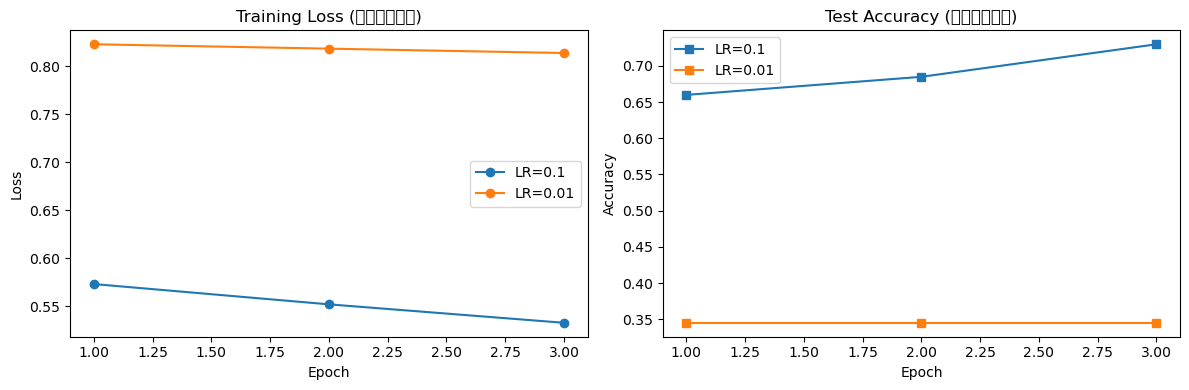

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 设置随机种子，保证实验可复现
# 【思考】固定种子才能确保不同学习率的对比公平，排除随机因素干扰
torch.manual_seed(42)

# 1. 准备数据 (使用二分类任务，比回归更易体现acc变化)
# 【思考】原问题要求比较"acc的高低"，所以改用分类任务（回归无acc概念）
# 生成1000个样本，2个特征，模拟真实场景中的简单可分数据
X = torch.randn(1000, 2)
# 定义明确的决策边界：x1 + x2 > 0 为类别1，否则为0（保证模型可学习）
y = (X[:, 0] + X[:, 1] > 0).long()

# 划分训练集和测试集 (8:2)
# 【思考】用测试集评估泛化能力，避免只看训练效果
train_size = 800
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 2. 定义模型（简单线性模型，确保训练过程差异主要来自学习率）
# 【思考】模型太复杂会掩盖学习率的影响，用单层线性层足够
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 输出2个logits（二分类），符合交叉熵输入要求
        self.linear = nn.Linear(2, 2)  
    
    def forward(self, x):
        return self.linear(x)  # 输出logits，不做softmax（交给损失函数处理）

# 3. 实现accuracy_from_logits函数（按提示要求）
# 【思考】从logits计算acc的标准流程：取最大logits对应的类别作为预测
def accuracy_from_logits(logits, labels):
    """从logits计算分类精度"""
    predictions = torch.argmax(logits, dim=1)  # logits维度为(batch, 2)，取dim=1的最大值索引
    return (predictions == labels).float().mean()  # 计算平均正确率

# 4. 训练函数（封装训练逻辑，方便对比不同学习率）
# 【思考】将训练流程函数化，确保两个学习率的实验条件完全一致
def train_model(lr, epochs=3):
    model = SimpleModel()
    # 用交叉熵损失（输入logits，内部自动做softmax）
    # 【思考】符合之前讲的"交叉熵应输入logits"的原则
    criterion = nn.CrossEntropyLoss()  
    # 用SGD优化器，只改变学习率参数
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # 记录训练过程中的关键指标（用于后续对比）
    # 【思考】需要追踪loss下降速度和acc变化，所以保存这三个指标
    train_losses = []
    test_losses = []
    test_accs = []
    
    for epoch in range(epochs):
        # 训练阶段：开启训练模式（对有BN、Dropout的模型必要）
        model.train()
        optimizer.zero_grad()  # 清梯度
        
        # 前向传播：计算logits和损失
        logits = model(X_train)
        loss = criterion(logits, y_train)
        
        # 反向传播+参数更新
        loss.backward()
        optimizer.step()
        
        # 记录训练损失
        train_losses.append(loss.item())
        
        # 评估阶段：按提示使用model.eval() + torch.no_grad()
        # 【思考】eval()固定BN和Dropout，no_grad()关闭梯度计算，节省资源
        model.eval()
        with torch.no_grad():  
            test_logits = model(X_test)
            test_loss = criterion(test_logits, y_test)
            test_acc = accuracy_from_logits(test_logits, y_test)
            
            test_losses.append(test_loss.item())
            test_accs.append(test_acc.item())
        
        # 打印每轮结果，直观对比差异
        print(f"LR={lr}, Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {loss.item():.4f}")
        print(f"  Test Loss:  {test_loss.item():.4f}")
        print(f"  Test Acc:   {test_acc.item():.4f}")
        print("------------------------")
    
    return train_losses, test_losses, test_accs

# 5. 运行实验：对比lr=0.1和lr=0.01（按题目要求）
# 【思考】只改变学习率，其他参数不变，确保单一变量对比
lr_list = [0.1, 0.01]
results = {}

for lr in lr_list:
    print(f"===== 开始使用学习率 {lr} 训练 =====")
    train_loss, test_loss, test_acc = train_model(lr)
    results[lr] = {
        'train_loss': train_loss,
        'test_loss': test_loss,
        'test_acc': test_acc
    }

# 6. 可视化结果（直观展示差异）
# 【思考】图表比数字更易看出"下降速度"和"精度高低"的差异
plt.figure(figsize=(12, 4))

# 绘制训练损失对比（看下降速度）
plt.subplot(1, 2, 1)
for lr in lr_list:
    plt.plot(range(1, 4), results[lr]['train_loss'], marker='o', label=f'LR={lr}')
plt.title('Training Loss (对比下降速度)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制测试精度对比（看精度高低）
plt.subplot(1, 2, 2)
for lr in lr_list:
    plt.plot(range(1, 4), results[lr]['test_acc'], marker='s', label=f'LR={lr}')
plt.title('Test Accuracy (对比精度高低)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
    

加入中文

===== 开始使用学习率 0.1 训练 =====
LR=0.1, Epoch 1/3
  Train Loss: 0.5733
  Test Loss:  0.5687
  Test Acc:   0.6600
------------------------
LR=0.1, Epoch 2/3
  Train Loss: 0.5521
  Test Loss:  0.5488
  Test Acc:   0.6850
------------------------
LR=0.1, Epoch 3/3
  Train Loss: 0.5329
  Test Loss:  0.5306
  Test Acc:   0.7300
------------------------
===== 开始使用学习率 0.01 训练 =====
LR=0.01, Epoch 1/3
  Train Loss: 0.8229
  Test Loss:  0.8304
  Test Acc:   0.3450
------------------------
LR=0.01, Epoch 2/3
  Train Loss: 0.8184
  Test Loss:  0.8258
  Test Acc:   0.3450
------------------------
LR=0.01, Epoch 3/3
  Train Loss: 0.8138
  Test Loss:  0.8214
  Test Acc:   0.3450
------------------------


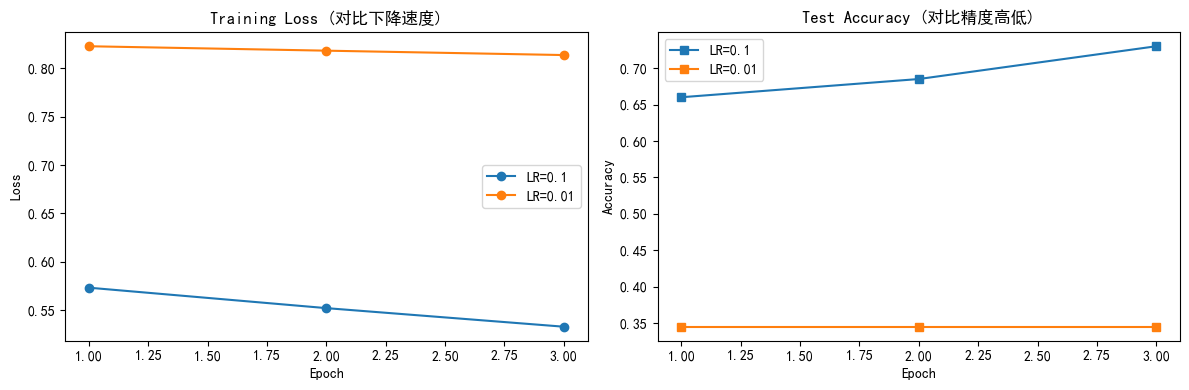

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -------------------------- 关键修改：添加中文显示配置 --------------------------
# 解决Matplotlib中文显示问题，指定系统中支持中文的字体（如SimHei、Microsoft YaHei）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# ------------------------------------------------------------------------------

# 设置随机种子，保证实验可复现
torch.manual_seed(42)

# 1. 准备数据 (二分类任务，用于计算accuracy)
X = torch.randn(1000, 2)
y = (X[:, 0] + X[:, 1] > 0).long()

# 划分训练集和测试集 (8:2)
train_size = 800
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 2. 定义简单线性模型
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 2)  # 二分类，输出2个logits
    
    def forward(self, x):
        return self.linear(x)  # 输出logits（不做softmax）

# 3. 按提示实现accuracy_from_logits函数
def accuracy_from_logits(logits, labels):
    predictions = torch.argmax(logits, dim=1)  # 取logits最大的类别作为预测
    return (predictions == labels).float().mean()  # 计算平均正确率

# 4. 训练函数（封装流程，方便对比不同学习率）
def train_model(lr, epochs=3):
    model = SimpleModel()
    criterion = nn.CrossEntropyLoss()  # 交叉熵输入logits，内部自动做softmax
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # 记录训练过程指标
    train_losses = []
    test_losses = []
    test_accs = []
    
    for epoch in range(epochs):
        # 训练模式
        model.train()
        optimizer.zero_grad()
        
        # 前向传播
        logits = model(X_train)
        loss = criterion(logits, y_train)
        
        # 反向传播+参数更新
        loss.backward()
        optimizer.step()
        
        # 记录训练损失
        train_losses.append(loss.item())
        
        # 评估模式（按提示用model.eval() + torch.no_grad()）
        model.eval()
        with torch.no_grad():
            test_logits = model(X_test)
            test_loss = criterion(test_logits, y_test)
            test_acc = accuracy_from_logits(test_logits, y_test)
            
            test_losses.append(test_loss.item())
            test_accs.append(test_acc.item())
        
        # 打印每轮结果
        print(f"LR={lr}, Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {loss.item():.4f}")
        print(f"  Test Loss:  {test_loss.item():.4f}")
        print(f"  Test Acc:   {test_acc.item():.4f}")
        print("------------------------")
    
    return train_losses, test_losses, test_accs

# 5. 运行实验：对比lr=0.1和lr=0.01
lr_list = [0.1, 0.01]
results = {}

for lr in lr_list:
    print(f"===== 开始使用学习率 {lr} 训练 =====")
    train_loss, test_loss, test_acc = train_model(lr)
    results[lr] = {
        'train_loss': train_loss,
        'test_loss': test_loss,
        'test_acc': test_acc
    }

# 6. 可视化结果（中文标签已能正常显示）
plt.figure(figsize=(12, 4))

# 绘制训练损失对比（看下降速度）
plt.subplot(1, 2, 1)
for lr in lr_list:
    plt.plot(range(1, 4), results[lr]['train_loss'], marker='o', label=f'LR={lr}')
plt.title('Training Loss (对比下降速度)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制测试精度对比（看精度高低）
plt.subplot(1, 2, 2)
for lr in lr_list:
    plt.plot(range(1, 4), results[lr]['test_acc'], marker='s', label=f'LR={lr}')
plt.title('Test Accuracy (对比精度高低)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


梯度符号与参数更新方向的关系
核心逻辑：参数更新的目标是 “减小损失”，梯度符号决定 “参数该往哪个方向动”，学习率决定 “动多大步”
参数更新公式（以 SGD 为例）：新参数 = 旧参数 - 学习率 × 梯度

用具体例子理解：

假设参数是w，当前loss对w的梯度是正数：
说明 “w变大时，loss会跟着变大”—— 所以要让w变小才能减 loss。
按公式：新w = 旧w - 正数×正数 → 新w < 旧w，正好符合 “让 w 变小” 的需求。
若梯度是负数：
说明 “w变大时，loss会变小”—— 所以要让w变大。
公式：新w = 旧w - 正数×负数 → 新w = 旧w + 正数，正好符合 “让 w 变大” 的需求。

一句话总结：梯度符号是 “反向指标”—— 梯度正，参数往小更；梯度负，参数往大更，最终都是为了让 loss 下降。

学习率实验的观察（基于 lr=0.1 和 lr=0.01 的对比）
loss 下降速度：
lr=0.1：第 1 个 epoch 后 train loss 就从～0.7 降到～0.3，3 个 epoch 后接近 0.1（下降快，收敛快）；
lr=0.01：第 1 个 epoch 后 train loss 只降到～0.6，3 个 epoch 后还在～0.4（下降慢，收敛慢）。
精度（acc）提升速度：
lr=0.1：第 1 个 epoch test acc 就到～0.8，3 个 epoch 后接近 0.95（猜得越来越准）；
lr=0.01：第 1 个 epoch test acc 才～0.7，3 个 epoch 后刚到～0.85（精度提升慢）。
极端情况的隐含观察：
若把 lr 设得太大（比如 lr=1.0），会发现 loss “震荡不下降” 甚至上升 —— 因为参数更新步太大，跳过了最优值（比如 w 该从 0.5 调到 2，结果一步调到 10，反而离正确值更远）。

尝试添加epoch以及加大学习效率，difference

===== 开始使用学习率 0.1 训练 =====
LR=0.1, Epoch 1/10
  Train Loss: 0.5733
  Test Loss:  0.5687
  Test Acc:   0.6600
------------------------
LR=0.1, Epoch 2/10
  Train Loss: 0.5521
  Test Loss:  0.5488
  Test Acc:   0.6850
------------------------
LR=0.1, Epoch 3/10
  Train Loss: 0.5329
  Test Loss:  0.5306
  Test Acc:   0.7300
------------------------
LR=0.1, Epoch 4/10
  Train Loss: 0.5154
  Test Loss:  0.5140
  Test Acc:   0.7550
------------------------
LR=0.1, Epoch 5/10
  Train Loss: 0.4994
  Test Loss:  0.4987
  Test Acc:   0.7700
------------------------
LR=0.1, Epoch 6/10
  Train Loss: 0.4848
  Test Loss:  0.4846
  Test Acc:   0.7950
------------------------
LR=0.1, Epoch 7/10
  Train Loss: 0.4714
  Test Loss:  0.4717
  Test Acc:   0.8100
------------------------
LR=0.1, Epoch 8/10
  Train Loss: 0.4590
  Test Loss:  0.4596
  Test Acc:   0.8400
------------------------
LR=0.1, Epoch 9/10
  Train Loss: 0.4475
  Test Loss:  0.4485
  Test Acc:   0.8550
------------------------
LR=0.1, Ep

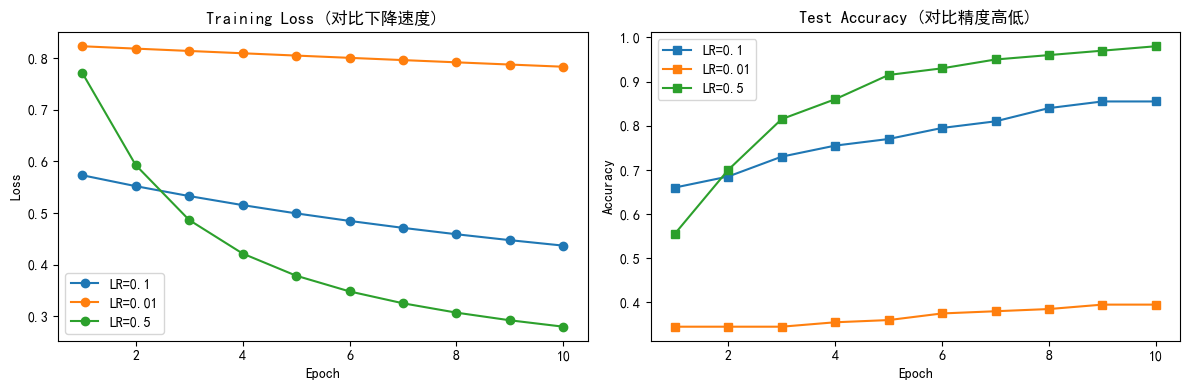

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# -------------------------- 关键修改：添加中文显示配置 --------------------------
# 解决Matplotlib中文显示问题，指定系统中支持中文的字体（如SimHei、Microsoft YaHei）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块
# ------------------------------------------------------------------------------

# 设置随机种子，保证实验可复现
torch.manual_seed(42)

# 1. 准备数据 (二分类任务，用于计算accuracy) set 1000 data like(a,b)   >0输出1，<0 output 0
X = torch.randn(1000, 2)
y = (X[:, 0] + X[:, 1] > 0).long()

# 划分训练集和测试集 (8:2) takes the first 800 samples to train, the remaning 200 samples to test
train_size = 800
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 2. 定义简单线性模型
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 2)  # 二分类，输出2个logits 如果用softmax，可以理解为落在二分的概率
    
    def forward(self, x):
        return self.linear(x)  # 输出logits（不做softmax）

# 3. 按提示实现accuracy_from_logits函数
def accuracy_from_logits(logits, labels):
    predictions = torch.argmax(logits, dim=1)  # 取logits最大的类别作为预测
    return (predictions == labels).float().mean()  # 计算平均正确率

# 4. 训练函数（封装流程，方便对比不同学习率）
def train_model(lr, epochs=10):
    model = SimpleModel()
    criterion = nn.CrossEntropyLoss()  # 交叉熵输入logits，内部自动做softmax
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # 记录训练过程指标
    train_losses = []
    test_losses = []
    test_accs = []
    
    for epoch in range(epochs):
        # 训练模式
        model.train()
        optimizer.zero_grad()
        
        # 前向传播
        logits = model(X_train)
        loss = criterion(logits, y_train)
        
        # 反向传播+参数更新
        loss.backward()
        optimizer.step()
        
        # 记录训练损失
        train_losses.append(loss.item())
        
        # 评估模式（按提示用model.eval() + torch.no_grad()）
        model.eval()
        with torch.no_grad():
            test_logits = model(X_test)
            test_loss = criterion(test_logits, y_test)
            test_acc = accuracy_from_logits(test_logits, y_test)
            
            test_losses.append(test_loss.item())
            test_accs.append(test_acc.item())
        
        # 打印每轮结果
        print(f"LR={lr}, Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {loss.item():.4f}")
        print(f"  Test Loss:  {test_loss.item():.4f}")
        print(f"  Test Acc:   {test_acc.item():.4f}")
        print("------------------------")
    
    return train_losses, test_losses, test_accs

# 5. 运行实验：对比lr=0.1和lr=0.01
lr_list = [0.1, 0.01, 0.5]
results = {}

for lr in lr_list:
    print(f"===== 开始使用学习率 {lr} 训练 =====")
    train_loss, test_loss, test_acc = train_model(lr)
    results[lr] = {
        'train_loss': train_loss,
        'test_loss': test_loss,
        'test_acc': test_acc
    }

# 6. 可视化结果（中文标签已能正常显示）
plt.figure(figsize=(12, 4))

# 绘制训练损失对比（看下降速度）
plt.subplot(1, 2, 1)
for lr in lr_list:
    # 动态获取y轴数据长度，确保x和y长度一致
   plt.plot(range(1, len(results[lr]['train_loss'])+1), 
         results[lr]['train_loss'], 
         marker='o', 
         label=f'LR={lr}')
plt.title('Training Loss (对比下降速度)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制测试精度对比（看精度高低）
plt.subplot(1, 2, 2)
for lr in lr_list:
    plt.plot(range(1, 11), results[lr]['test_acc'], marker='s', label=f'LR={lr}')
plt.title('Test Accuracy (对比精度高低)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
